[  6   6   6 ... 200 200 200]
[  3   3   3 ... 100 100 100]


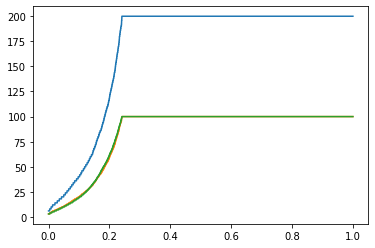

In [29]:

##Meeting time Naive Case

import numpy as np
import random

step = np.array(((0,1),(0,-1),(1,0),(-1,0)));

def meettime1 (Y, cap=200):
    X = np.array((0,0));
    Y = np.array(Y);
    for i in range(cap):
        if np.array_equal(X,Y):
            return i
        Y += random.choice(step)
    else:
        return cap

def meettime2 (Y, cap=100):
    X = np.array((0,0));
    Y = np.array(Y);
    for i in range(cap):
        if np.array_equal(X,Y):
            return i
        X += random.choice(step)
        Y += random.choice(step)
    else:
        return cap

if __name__ == "__main__":
    samplenum = 10000

    T1 = np.array([meettime1((2,4)) for i in range(samplenum)])
    T1.sort()
    print (T1)

    T2 = np.array([meettime2((2,4)) for i in range(samplenum)])
    T2.sort()
    print (T2)

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(np.arange(samplenum)/samplenum,T1)
    ax.plot(np.arange(samplenum)/samplenum,T1/2)
    ax.plot(np.arange(samplenum)/samplenum,T2)
    plt.show()



[  8   8   8 ... 200 200 200]
[  3   3   3 ... 100 100 100]


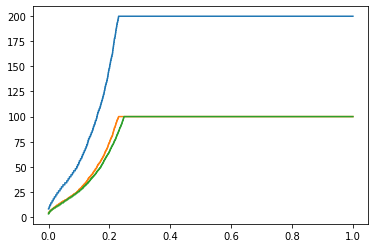

In [26]:
##Meeting time No going back Case

import numpy as np
import random

step = np.array(((0,1),(0,-1),(1,0),(-1,0)));
# print([-1, 0] == [-1, 0])

def meettime1 (Y, cap=200):
    pre = (-1, -1)
    X = np.array((0,0));
    Y = np.array(Y);
    for i in range(cap):
        if np.array_equal(X,Y):
            return i
        this_step = random.choice(step)
        while (this_step == pre).all():
          this_step = random.choice(step)
        Y += this_step
        pre = this_step
    else:
        return cap

def meettime2 (Y, cap=100):
    X = np.array((0,0));
    Y = np.array(Y);
    pre_x = (-1, -1)
    pre_y = (-1, -1)
    for i in range(cap):
        if np.array_equal(X,Y):
            return i
        x_this_step = random.choice(step)
        y_this_step = random.choice(step)
        while (x_this_step == pre_x).all():
          x_this_step = random.choice(step)
        while (y_this_step == pre_y).all():
          y_this_step = random.choice(step)
        X += x_this_step
        Y += y_this_step
        pre_x = x_this_step
        pre_y = y_this_step
    else:
        return cap

if __name__ == "__main__":
    samplenum = 10000

    T1 = np.array([meettime1((2,4)) for i in range(samplenum)])
    T1.sort()
    print (T1)

    T2 = np.array([meettime2((2,4)) for i in range(samplenum)])
    T2.sort()
    print (T2)

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(np.arange(samplenum)/samplenum,T1)
    ax.plot(np.arange(samplenum)/samplenum,T1/2)
    ax.plot(np.arange(samplenum)/samplenum,T2)
    plt.show()

[  8   8   8 ... 200 200 200]
[  3   3   3 ... 100 100 100]


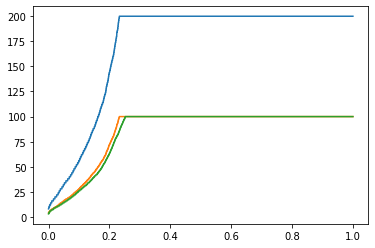

In [28]:
##Meeting time No going back + with boundary Case

import numpy as np
import random

step = np.array(((0,1),(0,-1),(1,0),(-1,0)));
H = 50
W = 50
WB = -(W//2)
EB = (W//2)
NB = (H//2)
SB = -(H//2)

def meettime1 (Y, cap=200):
    pre = (-1, -1)
    X = np.array((0,0));
    Y = np.array(Y);
    for i in range(cap):
        if np.array_equal(X,Y):
            return i

        if Y[0] == WB:
          this_step = random.choice(np.array(((0,1),(0,-1),(1,0))))
        elif Y[0] == EB:
          this_step = random.choice(np.array(((0,1),(0,-1),(-1,0))))
        elif Y[1] == NB:
          this_step = random.choice(np.array(((0,-1),(1,0),(-1,0))))
        elif Y[1] == SB:
          this_step = random.choice(np.array(((0,1),(1,0),(-1,0))))
        else:
          this_step = random.choice(step)

        while (this_step == pre).all():
          this_step = random.choice(step)
        Y += this_step
        pre = this_step

    else:
        return cap

def meettime2 (Y, cap=100):
    
    X = np.array((0,0));
    Y = np.array(Y);
    pre_x = (-1, -1)
    pre_y = (-1, -1)
    for i in range(cap):
        if np.array_equal(X,Y):
            return i

        if Y[0] == WB:
          y_this_step = random.choice(np.array(((0,1),(0,-1),(1,0))))
        elif Y[0] == EB:
          y_this_step = random.choice(np.array(((0,1),(0,-1),(-1,0))))
        elif Y[1] == NB:
          y_this_step = random.choice(np.array(((0,-1),(1,0),(-1,0))))
        elif Y[1] == SB:
          y_this_step = random.choice(np.array(((0,1),(1,0),(-1,0))))
        else:
          y_this_step = random.choice(step)


        if X[0] == WB:
          x_this_step = random.choice(np.array(((0,1),(0,-1),(1,0))))
        elif X[0] == EB:
          x_this_step = random.choice(np.array(((0,1),(0,-1),(-1,0))))
        elif X[1] == NB:
          x_this_step = random.choice(np.array(((0,-1),(1,0),(-1,0))))
        elif X[1] == SB:
          x_this_step = random.choice(np.array(((0,1),(1,0),(-1,0))))
        else:
          x_this_step = random.choice(step)

        
        while (x_this_step == pre_x).all():
          x_this_step = random.choice(step)
        while (y_this_step == pre_y).all():
          y_this_step = random.choice(step)
        X += x_this_step
        Y += y_this_step
        pre_x = x_this_step
        pre_y = y_this_step
    else:
        return cap

if __name__ == "__main__":
    samplenum = 10000

    T1 = np.array([meettime1((2,4)) for i in range(samplenum)])
    T1.sort()
    print (T1)

    T2 = np.array([meettime2((2,4)) for i in range(samplenum)])
    T2.sort()
    print (T2)

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(np.arange(samplenum)/samplenum,T1)
    ax.plot(np.arange(samplenum)/samplenum,T1/2)
    ax.plot(np.arange(samplenum)/samplenum,T2)
    plt.show()

[  4   4   4 ... 200 200 200]
[  2   2   2 ... 100 100 100]


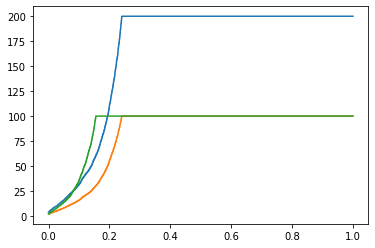

In [30]:
##Meeting time naive case but with 8 directions
import numpy as np
import random

step = np.array(((0,1),(0,-1),(1,0),(-1,0), (-1, 1), (-1, -1), (1, 1), (1, -1)));

def meettime1 (Y, cap=200):
    X = np.array((0,0));
    Y = np.array(Y);
    for i in range(cap):
        if np.array_equal(X,Y):
            return i
        Y += random.choice(step)
    else:
        return cap

def meettime2 (Y, cap=100):
    X = np.array((0,0));
    Y = np.array(Y);
    for i in range(cap):
        if np.array_equal(X,Y):
            return i
        X += random.choice(step)
        Y += random.choice(step)
    else:
        return cap

if __name__ == "__main__":
    samplenum = 10000

    T1 = np.array([meettime1((2,4)) for i in range(samplenum)])
    T1.sort()
    print (T1)

    T2 = np.array([meettime2((2,4)) for i in range(samplenum)])
    T2.sort()
    print (T2)

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(np.arange(samplenum)/samplenum,T1)
    ax.plot(np.arange(samplenum)/samplenum,T1/2)
    ax.plot(np.arange(samplenum)/samplenum,T2)
    plt.show()

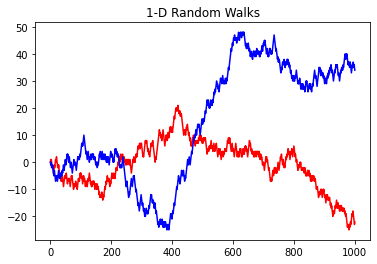

In [ ]:
# https://www.codespeedy.com/random-walk-program-in-python/
import numpy as np
import matplotlib.pyplot as plt
def Randomwalk1D(n): #n here is the no. of steps that we require
   x = 0
   y = 0
   xposition = [0] #starting from origin (0,0)
   yposition = [0] 

   for i in range (1,n+1):
       step = np.random.uniform(0,1)

       if step < 0.5: # if step is less than 0.5 we move up    
           x += 1
           y += 1  #moving up in u direction

       if step > 0.5: # if step is greater than 0.5 we move down  
           x += 1
           y += -1 #moving down in y direction
 
       xposition.append(x)
       yposition.append(y)

   return [xposition,yposition]

Randwalk = Randomwalk1D(1000) #creating an object for the Randomwalk1D class and passing value of n as 100
Randwalk1 = Randomwalk1D(1000) # the other person
plt.plot(Randwalk[0],Randwalk[1],'r-', label = "Randwalk1D person1") # 'r-' makes the color of the path red
plt.plot(Randwalk1[0], Randwalk1[1], 'b-', label = "Randomwalk1D person2")
plt.title("1-D Random Walks")
plt.show()

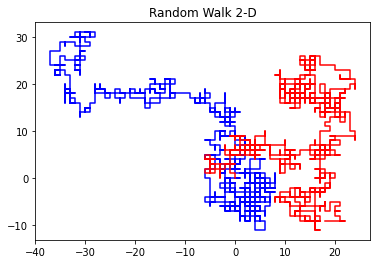

In [ ]:
import numpy as np 
import pylab 
import random 
n = 1000 #n is the number of steps(increase in the value of n increses the compelxity of graph) 
x1 = np.zeros(n) # x and y are arrays which store the coordinates of the position 
y1 = np.zeros(n) 
x2 = np.zeros(n)
y2 = np.zeros(n)

direction=["NORTH","SOUTH","EAST","WEST"] # Assuming the four directions of movement.
for i in range(1, n): 
    step = random.choice(direction) #Randomly choosing the direction of movement. 
    if step == "EAST": #updating the direction with respect to the direction of motion choosen.
        x1[i] = x1[i - 1] + 1
        y1[i] = y1[i - 1] 
    elif step == "WEST": 
        x1[i] = x1[i - 1] - 1
        y1[i] = y1[i - 1] 
    elif step == "NORTH": 
        x1[i] = x1[i - 1] 
        y1[i] = y1[i - 1] + 1
    else: 
        x1[i] = x1[i - 1] 
        y1[i] = y1[i - 1] - 1

for i in range(1, n): 
    step = random.choice(direction) #Randomly choosing the direction of movement. 
    if step == "EAST": #updating the direction with respect to the direction of motion choosen.
        x2[i] = x2[i - 1] + 1
        y2[i] = y2[i - 1]
    elif step == "WEST":  
        x2[i] = x2[i - 1] - 1
        y2[i] = y2[i - 1]
    elif step == "NORTH": 
        x2[i] = x2[i - 1] 
        y2[i] = y2[i - 1] + 1
    else: 
        x2[i] = x2[i - 1] 
        y2[i] = y2[i - 1] - 1
pylab.title("Random Walk 2-D")
pylab.plot(x1, y1, 'b-') #plotting the walk of the 1st person
pylab.plot(x2, y2, 'r-') #plotting the walk of the 2nd person
pylab.show()

MEET!
MEET!
MEET!
MEET!
MEET!


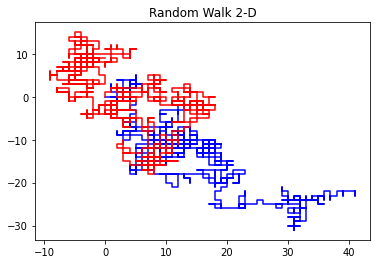

In [ ]:
import numpy as np 
import pylab 
import random 
n = 1000 #n is the number of steps(increase in the value of n increses the compelxity of graph) 
x1 = np.zeros(n) # x and y are arrays which store the coordinates of the position 
y1 = np.zeros(n) 
x2 = np.zeros(n)
y2 = np.zeros(n)

pre = ""
direction=["NORTH","SOUTH","EAST","WEST"] # Assuming the four directions of movement.
ori = np.array(direction)
for i in range(1, n): 
    step = random.choice(direction) #Randomly choosing the direction of movement. 
    if step == "EAST": #updating the direction with respect to the direction of motion choosen.
        if step == pre:
          choose_direction = ori[[True, True, False, True]]
          step = random.choice(choose_direction)
        x1[i] = x1[i - 1] + 1
        y1[i] = y1[i - 1] 
        pre = step
    elif step == "WEST": 
        if step == pre:
          choose_direction = ori[[True, True, True, False]]
          step = random.choice(choose_direction)
        x1[i] = x1[i - 1] - 1
        y1[i] = y1[i - 1] 
        pre = step
    elif step == "NORTH": 
        if step == pre:
          choose_direction = ori[[False, True, True, True]]
          step = random.choice(choose_direction)
        x1[i] = x1[i - 1] 
        y1[i] = y1[i - 1] + 1
        pre = step
    else: 
        if step == pre:
          choose_direction = ori[[True, False, True, True]]
          step = random.choice(choose_direction)
        x1[i] = x1[i - 1] 
        y1[i] = y1[i - 1] - 1
        pre = step

pre2 = ""
for i in range(1, n): 
    step = random.choice(direction) #Randomly choosing the direction of movement. 
    if step == "EAST": #updating the direction with respect to the direction of motion choosen.
        if step == pre2:
          choose_direction = ori[[True, True, False, True]]
          step = random.choice(choose_direction)
        x2[i] = x2[i - 1] + 1
        y2[i] = y2[i - 1]
        pre2 = step
    elif step == "WEST":  
        if step == pre2:
          choose_direction = ori[[True, True, True, False]]
          step = random.choice(choose_direction)
        x2[i] = x2[i - 1] - 1
        y2[i] = y2[i - 1]
        pre2 = step
    elif step == "NORTH": 
        if step == pre2:
          choose_direction = ori[[False, True, True, True]]
          step = random.choice(choose_direction)
      
        x2[i] = x2[i - 1] 
        y2[i] = y2[i - 1] + 1
        pre2 = step
    else: 
        if step == pre:
          choose_direction = ori[[True, False, True, True]]
          step = random.choice(choose_direction)
        x2[i] = x2[i - 1] 
        y2[i] = y2[i - 1] - 1
        pre2 = step

#check if they meet during this process
for i in range(n):
  if x1[i] == x2[i] and y1[i] == y2[i]:
    print("MEET!")
pylab.title("Random Walk 2-D")
pylab.plot(x1, y1, 'b-') #plotting the walk of the 1st person
pylab.plot(x2, y2, 'r-') #plotting the walk of the 2nd person
pylab.show()

In [ ]:
import numpy as np

ori = ["a", "b", "c", "d"]
ori = np.array(ori)
ori = ori[[False, True, True, True]]
print(ori.tolist())

['b', 'c', 'd']


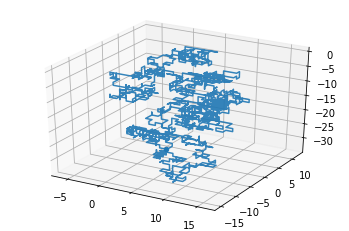

In [11]:
N =1500
R = (np.random.rand(N)*6).astype("int") #Randomly intializing the steps
x = np.zeros(N) 
y = np.zeros(N)
z = np.zeros(N)
x[ R==0 ] = -1; x[ R==1 ] = 1 #assigning the axis for each variable to use
y[ R==2 ] = -1; y[ R==3 ] = 1
z[ R==4 ] = -1; z[ R==5 ] = 1
x = np.cumsum(x) #The cumsum() function is used to get cumulative sum over a DataFrame or Series axis i.e. it sums the steps across for eachaxis of the plane.
y = np.cumsum(y)
z = np.cumsum(z)
plt.figure()
ax = plt.subplot(1,1,1, projection='3d')
ax.plot(x, y, z,alpha=0.9) #alpha sets the darkness of the path.
ax.scatter(x[-1],y[-1],z[-1])
plt.show()


MEET!
MEET!
MEET!
MEET!
MEET!
MEET!
MEET!
MEET!
MEET!


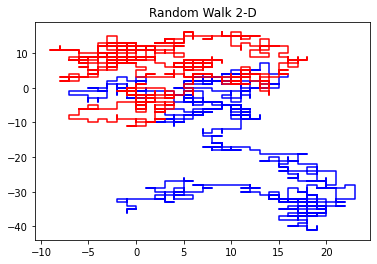

In [13]:
# With Boundary
# 
#
H = 200
W = 200
WB = -(W//2)
EB = (W//2)
NB = (H//2)
SB = -(H//2)

import numpy as np 
import pylab 
import random 
n = 1000 #n is the number of steps(increase in the value of n increses the compelxity of graph) 
x1 = np.zeros(n) # x and y are arrays which store the coordinates of the position 
y1 = np.zeros(n) 
x2 = np.zeros(n)
y2 = np.zeros(n)

pre = ""
direction=["NORTH","SOUTH","EAST","WEST"] # Assuming the four directions of movement.
ori = np.array(direction)
for i in range(1, n): 
    if x1[i-1] == WB: #if already reach west bound, choose other three directions
      step = random.choice(["NORTH","SOUTH","EAST"])
    elif x1[i-1] == EB: #if already reach east bound, choose other three directions
      step = random.choice(["NORTH","SOUTH","WEST"])
    elif y1[i-1] == NB: #if already reach north bound, choose other three directions
      step = random.choice(["WEST","SOUTH","EAST"])
    elif y1[i-1] == SB: #if already reach south bound, choose other three directions
      step = random.choice(["NORTH","WEST","EAST"])
    else:
      step = random.choice(direction) #Randomly choosing the direction of movement. 
    if step == "EAST": #updating the direction with respect to the direction of motion chosen.
        if step == pre:
          choose_direction = ori[[True, True, False, True]]
          step = random.choice(choose_direction)
        x1[i] = x1[i - 1] + 1
        y1[i] = y1[i - 1] 
        pre = step
    elif step == "WEST": 
        if step == pre:
          choose_direction = ori[[True, True, True, False]]
          step = random.choice(choose_direction)
        x1[i] = x1[i - 1] - 1
        y1[i] = y1[i - 1] 
        pre = step
    elif step == "NORTH": 
        if step == pre:
          choose_direction = ori[[False, True, True, True]]
          step = random.choice(choose_direction)
        x1[i] = x1[i - 1] 
        y1[i] = y1[i - 1] + 1
        pre = step
    else: 
        if step == pre:
          choose_direction = ori[[True, False, True, True]]
          step = random.choice(choose_direction)
        x1[i] = x1[i - 1] 
        y1[i] = y1[i - 1] - 1
        pre = step

pre2 = ""
for i in range(1, n): 
    step = random.choice(direction) #Randomly choosing the direction of movement. 
    if step == "EAST": #updating the direction with respect to the direction of motion choosen.
        if step == pre2:
          choose_direction = ori[[True, True, False, True]]
          step = random.choice(choose_direction)
        x2[i] = x2[i - 1] + 1
        y2[i] = y2[i - 1]
        pre2 = step
    elif step == "WEST":  
        if step == pre2:
          choose_direction = ori[[True, True, True, False]]
          step = random.choice(choose_direction)
        x2[i] = x2[i - 1] - 1
        y2[i] = y2[i - 1]
        pre2 = step
    elif step == "NORTH": 
        if step == pre2:
          choose_direction = ori[[False, True, True, True]]
          step = random.choice(choose_direction)
      
        x2[i] = x2[i - 1] 
        y2[i] = y2[i - 1] + 1
        pre2 = step
    else: 
        if step == pre:
          choose_direction = ori[[True, False, True, True]]
          step = random.choice(choose_direction)
        x2[i] = x2[i - 1] 
        y2[i] = y2[i - 1] - 1
        pre2 = step

#check if they meet during this process
for i in range(n):
  if x1[i] == x2[i] and y1[i] == y2[i]:
    print("MEET!")
pylab.title("Random Walk 2-D")
pylab.plot(x1, y1, 'b-') #plotting the walk of the 1st person
pylab.plot(x2, y2, 'r-') #plotting the walk of the 2nd person
pylab.show()

In [2]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s


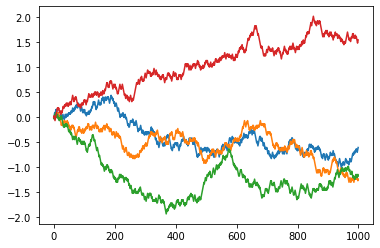

In [7]:
import matplotlib.pyplot as plt
import numpy as np
b = Brownian()
for i in range(4):
    plt.plot(b.gen_random_walk(1000))
plt.show()

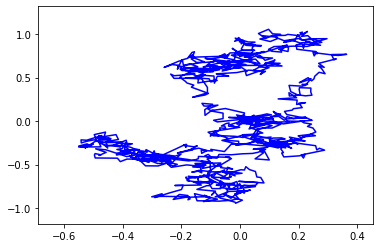

In [8]:
b1 = Brownian()
b2 = Brownian()

x = b1.gen_normal(1000)
y = b2.gen_normal(1000)

plt.plot(x,y,c='b')
xmax,xmin,ymax,ymin = x.max(),x.min(),y.max(),y.min()
scale_factor = 1.25
xmax,xmin,ymax,ymin = xmax*scale_factor,xmin*scale_factor,ymax*scale_factor,ymin*scale_factor
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()